<a href="https://colab.research.google.com/github/davidofitaly/05_ml_clustering_projects/blob/main/02_hierarchical_clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data generation 20 samples](#1)
3. [Visualization created data](#2)
4. [Visualization - dendrogram](#3)
5. [Data generation 1000 samples](#4)
6. [Hierarchical grouping algorithm](#5)
7. [](#6)
8. [](#7)


### <a name='0' > </a> Import of libraries

In [16]:
# Import the necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

sns.set(font_scale=1.1)
# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')


Pandas: 2.2.2
Seaborn: 0.13.2


### <a name ='1'> </a> Data generation 20 samples

In [30]:
# Import make_blobs datasets
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=20, centers=2, cluster_std=1.2, center_box=(-8.0, 8.0), random_state=42)[0]

# Create DataFrame
df_group_20 = pd.DataFrame(data, columns=['x1', 'x2'])
df_group_20

,x1,x2
0,-0.112303,8.132351
1,-4.077259,6.536684
2,-2.570727,7.862501
3,3.573125,1.217211
4,-2.563459,6.652553
5,3.962539,-0.773068
6,2.989855,3.801270
7,-3.222755,7.588526
8,3.058644,1.711643
9,-2.288342,6.930465


### <a name='2'> </a> Visualization created data

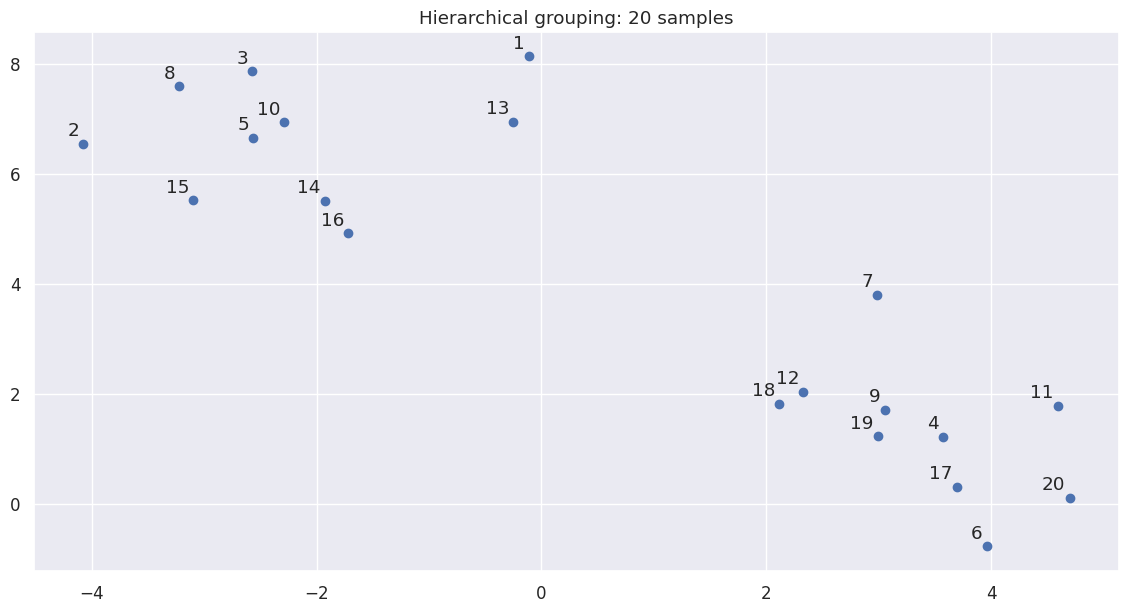

In [31]:
plt.figure(figsize=(14,7))
plt.scatter(data[:,0], data[:,1])

# Annotate each data point with a label (from 1 to 20) on the scatter plot.
# The label is placed with a small offset for better visibility (offset by -3 and 3 pixels from the point's coordinates).
for label, x, y in zip(range(1,21), data[:,0], data[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(-3,3), textcoords='offset points', ha='right', va='bottom')

plt.title(f'Hierarchical grouping: {len(df_group_20)} samples')
plt.show()


#### <a name='3'> </a> Visualization - dendrogram

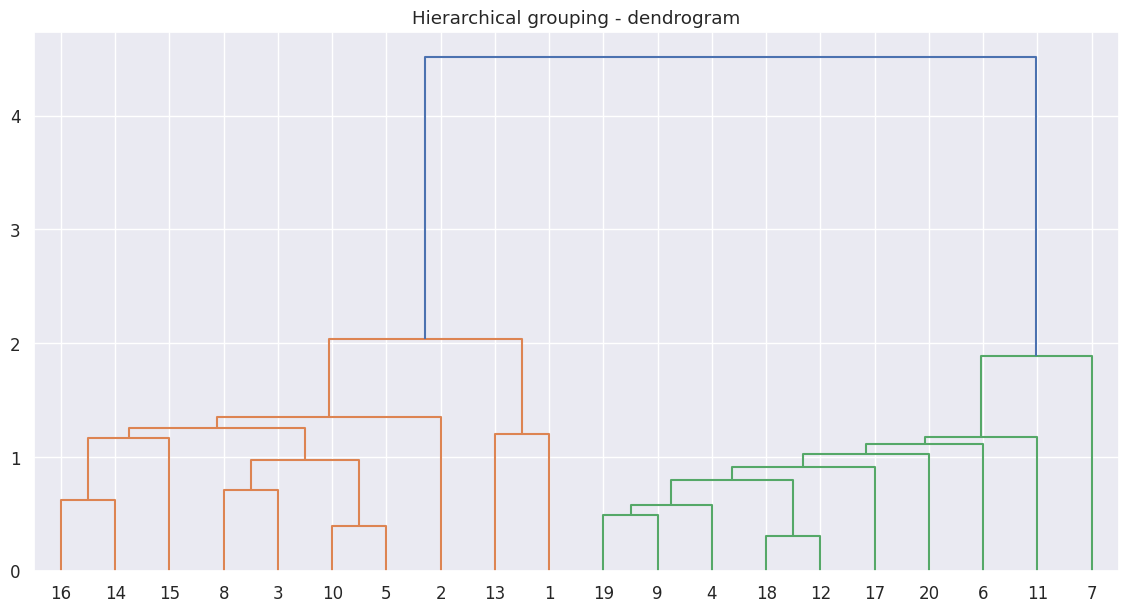

In [24]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Generate a linkage matrix using the hierarchical clustering algorithm
linked = linkage(data)

# Create a dendrogram to visualize the hierarchical clustering of the data points.
plt.figure(figsize=(14,7))
dendrogram(linked, orientation='top', labels=range(1, 21), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical grouping - dendrogram')
plt.show()

#### <a name='4'> </a> Data generation 1000 samples

In [92]:
# Import make_blobs datasets
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=500, centers=3, cluster_std=2.0, center_box=(-8.0, 8.0), random_state=42)[0]

# Create DataFrame
df_group_500 = pd.DataFrame(data, columns=['x1', 'x2'])
df_group_500.head()

,x1,x2
0,-3.205155,-6.910441
1,-1.681870,1.469946
2,8.091509,-0.038061
3,-2.791574,4.284399
4,6.114331,0.762385


### <a name='5'> </a> Hierarchical grouping algorithm

- Hierarchical clustering

In [93]:
px.scatter(df_group_500, 'x1', 'x2', width=1000, height=500, title='Hierarchical clustering', template='ggplot2')

In [94]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(data)

array([1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 0,
       2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       2, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2,
       0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0,
       2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2,

In [96]:
df_group_500['cluster'] = cluster.labels_
px.scatter(df_group_500, 'x1', 'x2', 'cluster', width=1000, height=500, template='ggplot2', title='Hierarchical clustering')

- dendrogram

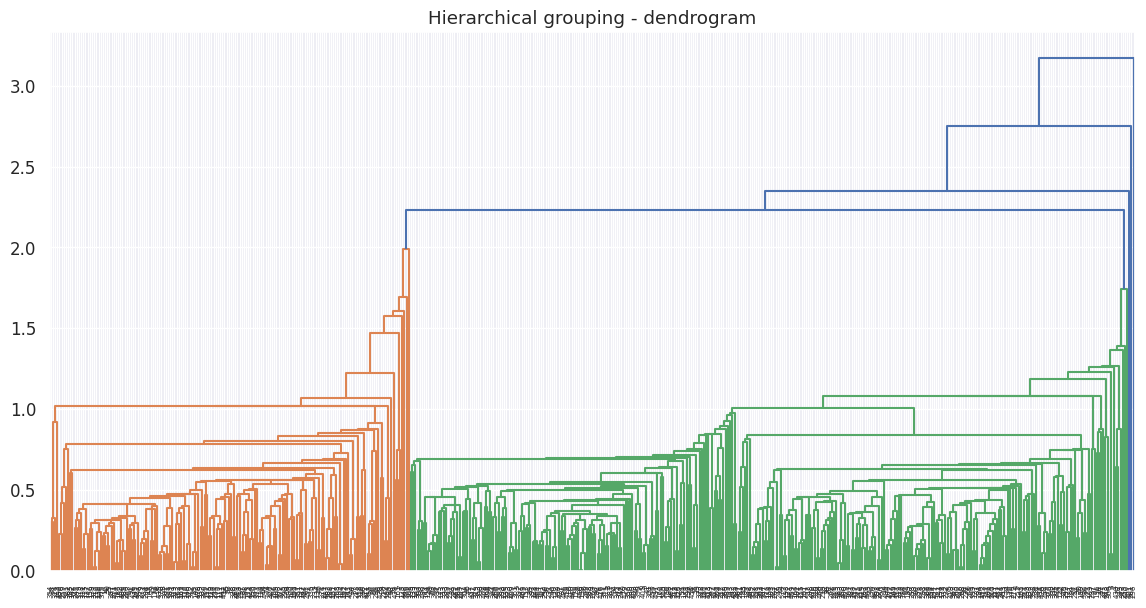

In [97]:
# Generate a linkage matrix using the hierarchical clustering algorithm
linked = linkage(data)

# Create a dendrogram to visualize the hierarchical clustering of the data points.
plt.figure(figsize=(14,7))
dendrogram(linked, orientation='top', labels=range(1, 501), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical grouping - dendrogram')
plt.show()